In [1]:
import pandas as pd
from vega_datasets import data

1) Resample by the day and take the average temperature. Visualize the average temperature over time.

In [5]:
data.sf_temps().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [11]:
# set to variable df
df = data.sf_temps()

In [13]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [28]:
# set date as index and sort, save to sf_temps variable
sf_temps = df.set_index('date').sort_index()
sf_temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [15]:
# max, min sf_temps 
sf_temps.index.min(), sf_temps.index.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2010-12-31 23:00:00'))

In [21]:
# playing with .loc
sf_temps.loc['2010-01']

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-01-31 19:00:00,52.4
2010-01-31 20:00:00,51.8
2010-01-31 21:00:00,51.3


In [22]:
# First attempt to set by daily frequency... wasn't able to aggregate mean
by_day = sf_temps.asfreq('D')

In [24]:
by_day.head()

,temp
date,
2010-01-01,47.8
2010-01-02,47.9
2010-01-03,48.0
2010-01-04,48.1
2010-01-05,48.0


In [27]:
# Use resample to set frequency to Daily AND aggregate date by mean
daily_avg = sf_temps.resample('D').mean()
daily_avg.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<AxesSubplot:xlabel='date'>

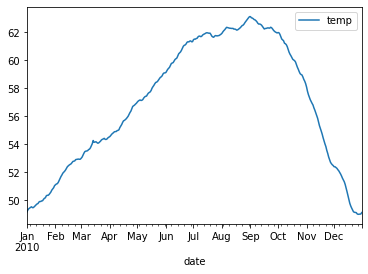

In [29]:
# plot
daily_avg.plot()